# OBSERVATION: Galton Box

https://www.youtube.com/shorts/MnBBV73KbDo?feature=share

# Galton Box Simulation
Simulating the paths of n_balls dropping through n_rows of pegs.


## Load Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from scipy.stats import norm

## Simple Ball Drop Simulations

In [ ]:
import numpy as np

n_rows = 20
n_balls = 1000

# Simulate the path of each ball: 0 for left, 1 for right
# Each row is a step, each column is a ball
paths = np.random.randint(0, 2, size=(n_rows, n_balls))

# Calculate the final position for each ball by summing the steps
# The final position will be the number of right turns (1s)
final_positions = np.sum(paths, axis=0)


### Doing the simulation with loops

In [ ]:
# Equivalent simulation using for loops for instructional purposes

n_rows = 20
n_balls = 1000

# Initialize an array to store the final positions
final_positions_for_loop = np.zeros(n_balls, dtype=int)

# Simulate each ball individually
for i in range(n_balls):
    current_position = 0  # Start at the center (or bin 0 relative to the start)
    # Simulate the ball dropping through each row
    for j in range(n_rows):
        # Decide to go left (0) or right (1)
        direction = np.random.randint(0, 2)
        if direction == 1:
            current_position += 1 # Move one bin to the right

    # Store the final position (number of right turns)
    final_positions_for_loop[i] = current_position

# You can compare final_positions_for_loop with the original final_positions
# They should have a similar distribution, though the exact values will differ
# due to the random nature of the simulation.


### A more realistic simulation assuming collisions produce random deviations

In [ ]:
n_rows = 20
n_balls = 1000

# Alternate simulation that introduces randomness associated with multiple
# collisions per row in an actual machine.

# Specify random deviations
l_dev = -0.8
r_dev = 0.8

# Generate continuous random deviations between l_dev and r_dev
paths_continuous = np.random.uniform(l_dev, r_dev, size=(n_rows, n_balls))

# Calculate the final continuous positions
final_positions_continuous = np.sum(paths_continuous, axis=0)

# Map continuous positions to the original bin numbering (0-20)
binned_positions = final_positions_continuous + n_rows / 2



## Visualize distribution of chosen number of ball drops


In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np

def plot_histogram(n, final_positions):
    """Plots a histogram of the final positions for the first n balls."""
    plt.figure(figsize=(12, 6))
    # Define bin edges to ensure centers are at integer values
    plt.hist(final_positions[:n], bins=np.arange(-0.5, n_rows + 1.5, 1), edgecolor='black')
    plt.xlabel('Bin')
    plt.ylabel('Frequency')
    plt.title('Galton Box Simulation Results')
    plt.xticks(range(n_rows + 1)) # Ensure ticks are at integer bin numbers
    plt.show()

interact(plot_histogram, n=widgets.IntSlider(min=1, max=n_balls, step=1, value=n_balls, description='Number of Balls:'), final_positions=widgets.fixed(final_positions));

# Discussion: What is the model for this simulation?

# Discrete Distributions

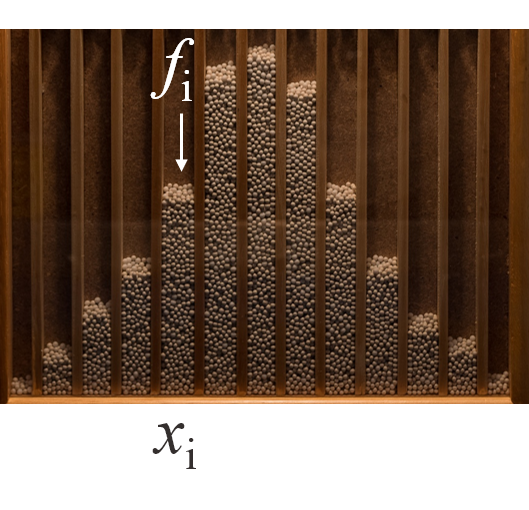

# Compare discrete BINOMIAL and continuous GAUSSIAN distributions

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean and standard deviation of the final positions
mu, std = norm.fit(final_positions)

# Create a histogram of the final positions
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(final_positions, bins=np.arange(-0.5, n_rows + 1.5, 1), density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the PDF of the fitted Gaussian distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Bin')
plt.ylabel('Density')
plt.xticks(range(n_rows + 1)) # Ensure ticks are at integer bin numbers
plt.show()

# Calculate empirical mean and standard deviation from the final positions
empirical_mean = np.mean(final_positions)
empirical_std = np.std(final_positions)

#print(f"Gaussian Fit Mean: {mu:.2f}, Gaussian Fit Std Dev: {std:.2f}")
#print(f"Empirical Mean: {empirical_mean:.2f}, Empirical Std Dev: {empirical_std:.2f}")

# Definitions of Empirical Moments

For a discrete distribution with values $x_i$ and corresponding frequencies $f_i$, and a total number of events $n = \sum_i f_i$, the empirical $k$-th moment ($\mu'_k$) is defined as:

$$\mu'_k = \frac{1}{n} \sum_i x_i^k \cdot f_i$$

Where:
- $x_i$ is the value of the random variable (in this case, the bin number).
- $f_i$ is the frequency (number of events) in class $i$.
- $n$ is the total number of events.

**Empirical First Moment (Mean):**

The empirical first moment ($\mu'_1$) is the mean of the distribution:

$$\mu'_1 = \bar{x} = \frac{1}{n} \sum_i x_i \cdot f_i$$

**Empirical Second Moment (related to Variance):**

The empirical second moment ($\mu'_2$) is:

$$\mu'_2 = \frac{1}{n} \sum_i x_i^2 \cdot f_i$$

The empirical variance ($\sigma^2$) is the second central moment and can be calculated as:

$$\sigma^2 = \mu'_2 - (\mu'_1)^2 = \frac{1}{n} \sum_i x_i^2 \cdot f_i - \left(\frac{1}{n} \sum_i x_i \cdot f_i\right)^2$$

Or, using the mean $\bar{x}$:

$$\sigma^2 = \frac{1}{n} \sum_i (x_i - \bar{x})^2 \cdot f_i$$

# Moments of the Gaussian Distribution

### The probability density function (PDF) of a theoretical Gaussian (Normal) distribution is given by:

$$\large f(x) = \frac{1}{\sqrt{2\pi b^2}} e^{-\frac{(x-a)^2}{2b^2}}$$

Where:
- $a$ is the mean of the distribution (first moment)
- $b$ is the standard deviation of the distribution (second moment).

The $k$-th moment ($\mu_k$) of a continuous distribution about the origin is defined as:

$$\large \mu_k = E[X^k] = \int_{-\infty}^{\infty} x^k f(x) dx$$


## Derivation of the first and second moments:

### **First Moment (Mean)**

The first moment ($\mu_1$) is the mean of the distribution. Using the substitution $u = x-a$, $x = u+a$, and $dx = du$:

$$\mu_1 = \int_{-\infty}^{\infty} x \frac{1}{\sqrt{2\pi b^2}} e^{-\frac{(x-a)^2}{2b^2}} dx = \frac{1}{\sqrt{2\pi b^2}} \int_{-\infty}^{\infty} (u+a) e^{-\frac{u^2}{2b^2}} du$$

$$= \frac{1}{\sqrt{2\pi b^2}} \left( \int_{-\infty}^{\infty} u e^{-\frac{u^2}{2b^2}} du + \int_{-\infty}^{\infty} a e^{-\frac{u^2}{2b^2}} du \right)$$

The first integral $\int_{-\infty}^{\infty} u e^{-\frac{u^2}{2b^2}} du$ is the integral of an odd function over a symmetric interval, which is 0.

The second integral $\int_{-\infty}^{\infty} a e^{-\frac{u^2}{2b^2}} du = a \int_{-\infty}^{\infty} e^{-\frac{u^2}{2b^2}} du$. We know that $\int_{-\infty}^{\infty} e^{-\frac{u^2}{2b^2}} du = \sqrt{2\pi b^2}$.

So,
$$\mu_1 = \frac{1}{\sqrt{2\pi b^2}} (0 + a \sqrt{2\pi b^2}) = a$$

Thus, the first moment of the Gaussian distribution is its mean, $a$.

### **Second Moment (variance)**

The second moment ($\mu_2$) is:

$$\mu_2 = \int_{-\infty}^{\infty} x^2 \frac{1}{\sqrt{2\pi b^2}} e^{-\frac{(x-a)^2}{2b^2}} dx$$

Using the substitution $u = x-a$, $x = u+a$, and $dx = du$:

$$\mu_2 = \frac{1}{\sqrt{2\pi b^2}} \int_{-\infty}^{\infty} (u+a)^2 e^{-\frac{u^2}{2b^2}} du = \frac{1}{\sqrt{2\pi b^2}} \int_{-\infty}^{\infty} (u^2 + 2au + a^2) e^{-\frac{u^2}{2b^2}} du$$

$$= \frac{1}{\sqrt{2\pi b^2}} \left( \int_{-\infty}^{\infty} u^2 e^{-\frac{u^2}{2b^2}} du + \int_{-\infty}^{\infty} 2au e^{-\frac{u^2}{2b^2}} du + \int_{-\infty}^{\infty} a^2 e^{-\frac{u^2}{2b^2}} du \right)$$

The second integral $\int_{-\infty}^{\infty} 2au e^{-\frac{u^2}{2b^2}} du = 2a \int_{-\infty}^{\infty} u e^{-\frac{u^2}{2b^2}} du = 0$ (integral of an odd function).

The third integral $\int_{-\infty}^{\infty} a^2 e^{-\frac{u^2}{2b^2}} du = a^2 \int_{-\infty}^{\infty} e^{-\frac{u^2}{2b^2}} du = a^2 \sqrt{2\pi b^2}$.

The first integral $\int_{-\infty}^{\infty} u^2 e^{-\frac{u^2}{2b^2}} du$ is related to the variance. We know that $\int_{-\infty}^{\infty} x^2 e^{-cx^2} dx = \frac{1}{2} \sqrt{\frac{\pi}{c^3}}$. Here, $c = \frac{1}{2b^2}$.

So, $\int_{-\infty}^{\infty} u^2 e^{-\frac{u^2}{2b^2}} du = \frac{1}{2} \sqrt{\frac{\pi}{(1/(2b^2))^3}} = \frac{1}{2} \sqrt{\pi (2b^2)^3} = \frac{1}{2} \sqrt{\pi \cdot 8 b^6} = \frac{1}{2} \cdot 2b^2 \sqrt{2\pi b^2} = b^2 \sqrt{2\pi b^2}$.

Therefore,
$$\mu_2 = \frac{1}{\sqrt{2\pi b^2}} (b^2 \sqrt{2\pi b^2} + 0 + a^2 \sqrt{2\pi b^2}) = b^2 + a^2$$

The second moment of the Gaussian distribution is $b^2 + a^2$.

The variance ($\sigma^2$) is the second central moment, which is $\mu_2 - \mu_1^2$:

$$\sigma^2 = (b^2 + a^2) - a^2 = b^2$$

Thus, the standard deviation $b$ is indeed the standard deviation of the Gaussian distribution.

# Cumulative Distribution Function

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
n_rows = 20
n_balls = 1000

# Simulate the path of each ball: 0 for left, 1 for right
# Each row is a step, each column is a ball
paths = np.random.randint(0, 2, size=(n_rows, n_balls))

# Calculate the final position for each ball by summing the steps
# The final position will be the number of right turns (1s)
final_positions = np.sum(paths, axis=0)

# Calculate the empirical CDF of the final positions
sorted_positions = np.sort(final_positions)
cdf_empirical = np.arange(1, len(sorted_positions) + 1) / len(sorted_positions)

# Calculate the CDF of the fitted Gaussian distribution
# Use the previously calculated mu and std from the Gaussian fit
x_cdf = np.linspace(min(final_positions), max(final_positions), 100)
cdf_gaussian = norm.cdf(x_cdf, mu, std)

# Plot the empirical and theoretical CDFs
plt.figure(figsize=(12, 6))
plt.plot(sorted_positions, cdf_empirical, label='Empirical CDF')
plt.plot(x_cdf, cdf_gaussian, 'k--', label='Gaussian CDF Fit')

# Add the Gaussian PDF normalized to an amplitude of 1
x_pdf = np.linspace(min(final_positions), max(final_positions), 1000)
pdf_gaussian = norm.pdf(x_pdf, mu, std)
# Normalize the PDF to have a maximum amplitude of 1
pdf_gaussian_normalized = pdf_gaussian / np.max(pdf_gaussian)
plt.plot(x_pdf, pdf_gaussian_normalized, 'g-', label='Normalized Gaussian PDF')


plt.xlabel('Bin')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function of Ball Drop Data and Gaussian Fit')
plt.legend()
plt.grid(True)
plt.show()

# Simulations of Normal Distibutions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from IPython.display import display, clear_output
import time

# --- parameters ---
n_hits   = 60          # total number of arrows
std_dev  = 1.0         # spread (accuracy); lower = tighter grouping
rng_seed = 42          # set None for different results each run

# --- data ---
rng = np.random.default_rng(rng_seed)
x = rng.normal(0, std_dev, n_hits)
y = rng.normal(0, std_dev, n_hits)

# --- figure setup ---
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_title("Arrows Hitting a Target")

# bullseye (concentric circles)
for r in [2.5, 1.75, 1.0, 0.5, 0.2]:
    ax.add_patch(Circle((0,0), r, fill=False, linewidth=1.2))

# initial empty scatter
scat = ax.scatter([], [], s=30)  # small filled circles

# --- incremental update loop ---
for i in range(n_hits):
    offsets = np.column_stack([x[:i+1], y[:i+1]])
    scat.set_offsets(offsets)
    clear_output(wait=True)
    display(fig)
    plt.pause(0.12)   # controls the "speed" of new hits

# show final frame one more time (prevents it from disappearing)
clear_output(wait=True)
display(fig)


In [ ]:
import matplotlib.pyplot as plt

fig2, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(x, bins=12)
axes[0].set_title("X-error (Gaussian)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("count")

axes[1].hist(y, bins=12)
axes[1].set_title("Y-error (Gaussian)")
axes[1].set_xlabel("y")
axes[1].set_ylabel("count")

plt.tight_layout()
plt.show()


# Simulated Wind

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from IPython.display import display, clear_output

# --- parameters ---
n_hits   = 60          # total number of arrows
std_dev  = 1.0         # random spread (accuracy); lower = tighter grouping
wind_dir = "right"     # "left" or "right"
wind_mag = 0.5         # systematic error in multiples of std_dev
rng_seed = 42          # set None for different results each run

# --- systematic wind offset ---
if wind_dir == "right":
    wind_offset = wind_mag * std_dev
elif wind_dir == "left":
    wind_offset = -wind_mag * std_dev
else:
    wind_offset = 0.0  # no wind

# --- data generation ---
rng = np.random.default_rng(rng_seed)
x = rng.normal(0, std_dev, n_hits) + wind_offset
y = rng.normal(0, std_dev, n_hits)  # wind only affects horizontal spread here

# --- figure setup ---
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_title("Arrow Hits with Random Error + Systematic Wind")

# bullseye (concentric circles)
for r in [2.5, 1.75, 1.0, 0.5, 0.2]:
    ax.add_patch(Circle((0,0), r, fill=False, linewidth=1.2))

# initial empty scatter
scat = ax.scatter([], [], s=30, c="blue")

# --- incremental update loop ---
for i in range(n_hits):
    offsets = np.column_stack([x[:i+1], y[:i+1]])
    scat.set_offsets(offsets)
    clear_output(wait=True)
    display(fig)
    plt.pause(0.12)   # controls the "speed" of new hits

# show final frame one more time
clear_output(wait=True)
display(fig)


In [ ]:
import matplotlib.pyplot as plt

fig2, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(x, bins=12)
axes[0].set_title("X-error (Gaussian)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("count")

axes[1].hist(y, bins=12)
axes[1].set_title("Y-error (Gaussian)")
axes[1].set_xlabel("y")
axes[1].set_ylabel("count")

plt.tight_layout()
plt.show()


# Measurement Errors that are Normally Distributed

* Voltage or current readings
* Peak position or intensity in spectroscopy
* Microscopy measurements of dimensions